## LINEAR-REGRESSION


## STEP-1:IMPORT THE DATASET

In [4]:
#FIRST IMPORT THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline



In [11]:
#READ THE DATA FROM THE CSV FILE

data="http://bit.ly/w-data"
students_data = pd.read_csv(data)
students_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
#ITS SHOW THE SIZE OF DATASET
students_data.shape

(25, 2)

In [16]:
#SHOWS SOME STATICAL INFORMATION ABOUT GIVEN DATA
students_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [17]:
#SHOWS NULLSUM IN THE DATASET
students_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## STEP2:VISUALIZE AND ANALYZE THE DATASET

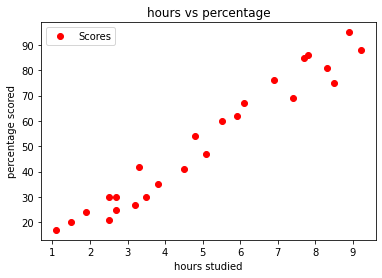

In [23]:
#ploting the distribution of scores and number of hours
students_data.plot(x='Hours',y='Scores',style='ro')
plt.title('hours vs percentage')
plt.xlabel('hours studied')
plt.ylabel('percentage scored')
plt.show()

## STEP-3:PREPARE THE DATA

In [29]:
x=students_data.iloc[:, :-1].values
y=students_data.iloc[:,  1].values


In [30]:
#number of hours study
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [31]:
#marks they got
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [32]:
#now split the data into train and test data sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [34]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [35]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [36]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

## STEP-4:DESIGN AND TRAIN THE MACHINE LEARNING MODEL

In [37]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train)

print("training complete")


training complete


## STEP-5: VISUALIZE THE MODEL

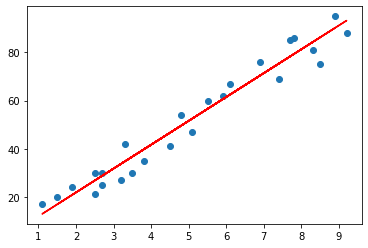

In [38]:
#plotting reegression line

line=regressor.coef_*x+regressor.intercept_

#ploting for test data
plt.scatter(x,y)
plt.plot(x,line,color='red');
plt.show()

## STEP-6: MAKE A PREDICTION

In [39]:

#making predictions
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [40]:
#predicted vs actual
df=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [47]:
#testing the custom input

hours=9.7
own_pred=regressor.predict([[hours]])
print(f"no of hours={hours}")
print(f"predicted score={own_pred[0]}")

no of hours=9.7
predicted score=98.15152790366437


## STEP7:EVALUATE THE MODEL

In [48]:
#mean absolute error
from sklearn import metrics
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))

mean absolute error: 4.183859899002982


In [49]:
print("max error:",metrics.max_error(y_test,y_pred))

max error: 6.732260779489835


In [50]:
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))

mean squared error: 21.598769307217456


In [51]:
##MODEL EVALATATION COMPLETED 